In [3]:
import cv2

In [4]:
!unzip '/content/drive/MyDrive/FaceMaskDataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/49_Greeting_peoplegreeting_49_29.xml  
  inflating: train/49_Greeting_peoplegreeting_49_288.xml  
  inflating: train/49_Greeting_peoplegreeting_49_269.xml  
  inflating: train/49_Greeting_peoplegreeting_49_267.xml  
  inflating: train/49_Greeting_peoplegreeting_49_255.xml  
  inflating: train/49_Greeting_peoplegreeting_49_253.xml  
  inflating: train/49_Greeting_peoplegreeting_49_243.xml  
  inflating: train/49_Greeting_peoplegreeting_49_239.xml  
  inflating: train/49_Greeting_peoplegreeting_49_236.xml  
  inflating: train/49_Greeting_peoplegreeting_49_222.xml  
  inflating: train/49_Greeting_peoplegreeting_49_215.xml  
  inflating: train/49_Greeting_peoplegreeting_49_212.xml  
  inflating: train/49_Greeting_peoplegreeting_49_21.xml  
  inflating: train/49_Greeting_peoplegreeting_49_20.xml  
  inflating: train/49_Greeting_peoplegreeting_49_440.xml  
  inflating: train/49_Greeting_peoplegreeting_49_316.xml  
  inflat

In [5]:
import xml.etree.ElementTree as ET
import os

In [6]:
import csv
f = open('FaceMaskDataset_detr.csv', 'w')
header = ['filename', 'class','width','height','xmin','ymin','xmax','ymax']
writer = csv.writer(f)
writer.writerow(header)

49

In [7]:
for i in os.listdir("/content/train"):
     #for j in os.listdir("duc2002extracts(1)/"+str(i)):
    
          if (i[-3:] == "xml"):
            clas=[]
            xmin=[]
            xmax=[]
            ymin=[]
            ymax=[]
            tree = ET.parse("/content/train/"+str(i))
            root = tree.getroot()
            for name in root.findall(".//filename"):
              path =name.text
           
            for width in root.findall(".//size/width"):
              width=width.text
            for height in root.findall(".//size/height"):
              height=height.text
            for obj in root.findall(".//object"):
              clas.append(obj.find('name').text)
              for bndx in obj.findall('.//bndbox'):
                xmin.append(bndx.findtext('xmin'))
                xmax.append(bndx.findtext('xmax'))
                ymin.append(bndx.findtext('ymin'))
                ymax.append(bndx.findtext('ymax'))
            for loo in range(len(clas)):
                if(path[-3:]=='xml'):
                    break
                data = ['/content/train/'+str(path), 'face', width,height,xmin[loo],ymin[loo],xmax[loo],ymax[loo]]
                #data = ['/content/train/'+str(path), 'face', width,height,xmin[loo],ymin[loo],xmax[loo],ymax[loo]]
                writer.writerow(data)
            
for i in os.listdir("/content/val"):
     #for j in os.listdir("duc2002extracts(1)/"+str(i)):
          if (i[-3:] == "xml"):
            clas=[]
            xmin=[]
            xmax=[]
            ymin=[]
            ymax=[]
            tree = ET.parse("/content/val/"+str(i))
            root = tree.getroot()
            for name in root.findall(".//filename"):
              path =name.text
            for width in root.findall(".//size/width"):
              width=width.text
            for height in root.findall(".//size/height"):
              height=height.text
            for obj in root.findall(".//object"):
              clas.append(obj.find('name').text)
              for bndx in obj.findall('.//bndbox'):
                xmin.append(bndx.findtext('xmin'))
                xmax.append(bndx.findtext('xmax'))
                ymin.append(bndx.findtext('ymin'))
                ymax.append(bndx.findtext('ymax'))
            for loo in range(len(clas)):
                if(path[-3:]=='xml'):
                   break
                data = ['/content/val/'+str(path),'face', width,height,xmin[loo],ymin[loo],xmax[loo],ymax[loo]]
                #data = ['/content/val/'+str(path), 'face', width,height,xmin[loo],ymin[loo],xmax[loo],ymax[loo]]
                writer.writerow(data)
            

           

In [8]:
import pandas as pd
FMD=pd.read_csv('/content/FaceMaskDataset_detr.csv')
FMD

filename class  width  height  \
0             /content/train/4_Dancing_Dancing_4_962.jpg  face   1024    1024   
1      /content/train/16_Award_Ceremony_Awards_Ceremo...  face   1024    1474   
2      /content/train/16_Award_Ceremony_Awards_Ceremo...  face   1024    1474   
3      /content/train/16_Award_Ceremony_Awards_Ceremo...  face   1024    1474   
4      /content/train/32_Worker_Laborer_Worker_Labore...  face   1024     676   
...                                                  ...   ...    ...     ...   
15251  /content/val/20_Family_Group_Family_Group_20_1...  face   1024     710   
15252  /content/val/20_Family_Group_Family_Group_20_1...  face   1024     710   
15253  /content/val/20_Family_Group_Family_Group_20_1...  face   1024     710   
15254  /content/val/20_Family_Group_Family_Group_20_1...  face   1024     710   
15255  /content/val/20_Family_Group_Family_Group_20_1...  face   1024     710   

       xmin  ymin  xmax  ymax  
0       354   220   582   502  
1       461   134   579   280  
2       879   288   901   323  
3       992   270  1015   304  
4       626    18  1024   480  
...     ...   ...   ...   ...  
15251   971    60  1018   116  
15252   894   293   945   353  
15253   784   274   827   330  
15254   667   260   709   318  
15255   562   247   601   292  

[15256 rows x 8 columns]

In [9]:
!unzip '/content/drive/MyDrive/medical-mask-dataset.zip'

Archive:  /content/drive/MyDrive/medical-mask-dataset.zip
  inflating: Dataset/Medical_Masks_Dataset/Readme.txt  
  inflating: Dataset/Medical_Masks_Dataset/annotations/classes.txt  
  inflating: Dataset/Medical_Masks_Dataset/annotations/instances_images.json  
  inflating: Dataset/Medical_Masks_Dataset/classes.txt  
  inflating: Dataset/Medical_Masks_Dataset/images/1.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/10.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/100.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/101.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/102.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/103.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/104.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/105.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/106.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/107.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/108.jpg  
  inflating: Dataset/Med

In [10]:
import csv
f = open('MedicalMasksDataset_detr.csv', 'w')
header = ['filename', 'class','width','height','xmin','ymin','xmax','ymax']
writer = csv.writer(f)
writer.writerow(header)

49

In [11]:
for i in os.listdir("/content/Dataset/Medical_Masks_Dataset/xml_labels"):
     #for j in os.listdir("duc2002extracts(1)/"+str(i)):
          if (i[-3:] == "xml"):
            filename=''
            width=''
            height=''
            cls=[]
            xmin=[]
            xmax=[]
            ymin=[]
            ymax=[]
            tree = ET.parse("/content/Dataset/Medical_Masks_Dataset/xml_labels/"+str(i))
            root = tree.getroot()
            for name in root.findall(".//filename"):
              filename=name.text
            if(filename[-3:]=='xml'):
              break
            for size in root.findall(".//size"):
              width=size.find('width').text
              height=size.find('height').text

              
            for objectt in root.findall(".//object"):
              cls.append(objectt.find('name').text)

            for size in root.findall(".//bndbox"):
              xmin.append(size.find('xmin').text)
              ymin.append(size.find('ymin').text)
              xmax.append(size.find('xmax').text)
              ymax.append(size.find('ymax').text)

            for i in range(len(xmin)):
              data = [filename,'face', width,height,xmin[i],ymin[i],xmax[i],ymax[i]]
              #data = [filename, 'face', width,height,xmin[i],ymin[i],xmax[i],ymax[i]]
              writer.writerow(data)

In [12]:
import pandas as pd
mdm=pd.read_csv('/content/MedicalMasksDataset_detr.csv')
mdm['filename']='/content/Dataset/Medical_Masks_Dataset/images/'+mdm['filename']
mdm = mdm.loc[mdm['class'] != 'bad']
mdm['class']='face'
mdm



filename class  width  height  \
0     /content/Dataset/Medical_Masks_Dataset/images/...  face   1050     700   
1     /content/Dataset/Medical_Masks_Dataset/images/...  face   1050     700   
2     /content/Dataset/Medical_Masks_Dataset/images/...  face   1050     700   
3     /content/Dataset/Medical_Masks_Dataset/images/...  face   1050     700   
4     /content/Dataset/Medical_Masks_Dataset/images/...  face   1050     700   
...                                                 ...   ...    ...     ...   
3796  /content/Dataset/Medical_Masks_Dataset/images/...  face   1000     667   
3797  /content/Dataset/Medical_Masks_Dataset/images/...  face   1000     667   
3798  /content/Dataset/Medical_Masks_Dataset/images/...  face   1000     667   
3799  /content/Dataset/Medical_Masks_Dataset/images/...  face   1000     667   
3800  /content/Dataset/Medical_Masks_Dataset/images/...  face   1000     667   

      xmin  ymin  xmax  ymax  
0       57   334   174   455  
1      152   501   280   641  
2      297   294   367   369  
3      224   311   276   357  
4      296   215   346   269  
...    ...   ...   ...   ...  
3796   744   269   801   332  
3797   767   160   819   214  
3798   834   297   950   407  
3799   911   122   949   162  
3800   854   122   894   165  

[3801 rows x 8 columns]

In [13]:
t_data=FMD.append(mdm)
t_data

filename class  width  height  \
0            /content/train/4_Dancing_Dancing_4_962.jpg  face   1024    1024   
1     /content/train/16_Award_Ceremony_Awards_Ceremo...  face   1024    1474   
2     /content/train/16_Award_Ceremony_Awards_Ceremo...  face   1024    1474   
3     /content/train/16_Award_Ceremony_Awards_Ceremo...  face   1024    1474   
4     /content/train/32_Worker_Laborer_Worker_Labore...  face   1024     676   
...                                                 ...   ...    ...     ...   
3796  /content/Dataset/Medical_Masks_Dataset/images/...  face   1000     667   
3797  /content/Dataset/Medical_Masks_Dataset/images/...  face   1000     667   
3798  /content/Dataset/Medical_Masks_Dataset/images/...  face   1000     667   
3799  /content/Dataset/Medical_Masks_Dataset/images/...  face   1000     667   
3800  /content/Dataset/Medical_Masks_Dataset/images/...  face   1000     667   

      xmin  ymin  xmax  ymax  
0      354   220   582   502  
1      461   134   579   280  
2      879   288   901   323  
3      992   270  1015   304  
4      626    18  1024   480  
...    ...   ...   ...   ...  
3796   744   269   801   332  
3797   767   160   819   214  
3798   834   297   950   407  
3799   911   122   949   162  
3800   854   122   894   165  

[19057 rows x 8 columns]

In [14]:
full_data=t_data
full_data

filename class  width  height  \
0            /content/train/4_Dancing_Dancing_4_962.jpg  face   1024    1024   
1     /content/train/16_Award_Ceremony_Awards_Ceremo...  face   1024    1474   
2     /content/train/16_Award_Ceremony_Awards_Ceremo...  face   1024    1474   
3     /content/train/16_Award_Ceremony_Awards_Ceremo...  face   1024    1474   
4     /content/train/32_Worker_Laborer_Worker_Labore...  face   1024     676   
...                                                 ...   ...    ...     ...   
3796  /content/Dataset/Medical_Masks_Dataset/images/...  face   1000     667   
3797  /content/Dataset/Medical_Masks_Dataset/images/...  face   1000     667   
3798  /content/Dataset/Medical_Masks_Dataset/images/...  face   1000     667   
3799  /content/Dataset/Medical_Masks_Dataset/images/...  face   1000     667   
3800  /content/Dataset/Medical_Masks_Dataset/images/...  face   1000     667   

      xmin  ymin  xmax  ymax  
0      354   220   582   502  
1      461   134   579   280  
2      879   288   901   323  
3      992   270  1015   304  
4      626    18  1024   480  
...    ...   ...   ...   ...  
3796   744   269   801   332  
3797   767   160   819   214  
3798   834   297   950   407  
3799   911   122   949   162  
3800   854   122   894   165  

[19057 rows x 8 columns]

In [15]:
full_data.to_csv('/content/final_dataset.csv')

In [16]:
!git clone https://github.com/facebookresearch/detr.git

Cloning into 'detr'...
remote: Enumerating objects: 260, done.
remote: Total 260 (delta 0), reused 0 (delta 0), pack-reused 260
Receiving objects: 100% (260/260), 12.85 MiB | 34.71 MiB/s, done.
Resolving deltas: 100% (142/142), done.


In [17]:
!pip install -U albumentations

     |████████████████████████████████| 102 kB 26.6 MB/s 
     |████████████████████████████████| 47.8 MB 1.2 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [18]:
!pip uninstall opencv-python-headless 
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [19]:
import os
import numpy as np 
import pandas as pd 
from datetime import datetime
import time
import random
from tqdm.autonotebook import tqdm

import cv2
#Torch
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
from torch.utils.data.sampler import SequentialSampler, RandomSampler

#sklearn
from sklearn.model_selection import StratifiedKFold

#CV
import cv2

################# DETR FUCNTIONS FOR LOSS######################## 
import sys
sys.path.append('./detr/')

from detr.models.matcher import HungarianMatcher
from detr.models.detr import SetCriterion
#################################################################

#Albumenatations
import albumentations as A
import matplotlib.pyplot as plt
from albumentations.pytorch.transforms import ToTensorV2

#Glob
from glob import glob

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import sys


In [20]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        
    @property
    def avg(self):
        return (self.sum / self.count) if self.count>0 else 0

In [21]:
marking = pd.read_csv('/content/final_dataset.csv')

In [22]:
marking['w']=marking['xmax']-marking['xmin']
marking['h']=marking['ymax']-marking['ymin']


In [23]:
marking = marking.sample(frac = 1)
marking

Unnamed: 0                                           filename class  \
6896         6896                   /content/train/test_00004730.jpg  face   
3242         3242                   /content/train/test_00004653.jpg  face   
13023       13023                     /content/val/test_00003817.jpg  face   
13181       13181                     /content/val/test_00004706.jpg  face   
11357       11357         /content/train/19_Couple_Couple_19_130.jpg  face   
...           ...                                                ...   ...   
6099         6099  /content/train/28_Sports_Fan_Sports_Fan_28_786...  face   
3440         3440                   /content/train/test_00004187.jpg  face   
4571         4571  /content/train/49_Greeting_peoplegreeting_49_4...  face   
5566         5566                   /content/train/test_00001651.jpg  face   
10026       10026  /content/train/28_Sports_Fan_Sports_Fan_28_680...  face   

       width  height  xmin  ymin  xmax  ymax    w    h  
6896     800     800   269   234   491   485  222  251  
3242     800     800   468   224   759   645  291  421  
13023    800     566    65   233   243   456  178  223  
13181    261     554   160    73   188   119   28   46  
11357   1024     683   286    36   378   192   92  156  
...      ...     ...   ...   ...   ...   ...  ...  ...  
6099    1024    1366   105   321   126   347   21   26  
3440     781     781   107   280   321   574  214  294  
4571    1024     681   989   409  1011   432   22   23  
5566     170     112    59    26   102    72   43   46  
10026   1024     681   294   262   316   291   22   29  

[19057 rows x 11 columns]

In [24]:
train_size=int(marking.shape[0]*0.6)
train_data=marking.iloc[:train_size,1:]
test_data=marking.iloc[train_size:,1:]

In [25]:
train_data

filename class  width  height  \
6896                    /content/train/test_00004730.jpg  face    800     800   
3242                    /content/train/test_00004653.jpg  face    800     800   
13023                     /content/val/test_00003817.jpg  face    800     566   
13181                     /content/val/test_00004706.jpg  face    261     554   
11357         /content/train/19_Couple_Couple_19_130.jpg  face   1024     683   
...                                                  ...   ...    ...     ...   
5508                    /content/train/test_00003790.jpg  face    140     105   
17561  /content/Dataset/Medical_Masks_Dataset/images/...  face    800     484   
11597  /content/train/52_Photographers_photographerta...  face   1024     683   
2473   /content/train/28_Sports_Fan_Sports_Fan_28_632...  face   1024     521   
2917     /content/train/51_Dresses_wearingdress_51_2.jpg  face   1024    1570   

       xmin  ymin  xmax  ymax    w    h  
6896    269   234   491   485  222  251  
3242    468   224   759   645  291  421  
13023    65   233   243   456  178  223  
13181   160    73   188   119   28   46  
11357   286    36   378   192   92  156  
...     ...   ...   ...   ...  ...  ...  
5508     31    12    89    74   58   62  
17561   583   116   635   172   52   56  
11597   718   352   742   382   24   30  
2473     44   445    55   458   11   13  
2917    392    98   545   303  153  205  

[11434 rows x 10 columns]

In [26]:
test_data

filename class  width  height  \
10805     /content/train/30_Surgeons_Surgeons_30_500.jpg  face   1024    1328   
17230  /content/Dataset/Medical_Masks_Dataset/images/...  face   1908    1146   
9835   /content/train/31_Waiter_Waitress_Waiter_Waitr...  face   1024     769   
13333  /content/val/13_Interview_Interview_Sequences_...  face   1024     576   
17082  /content/Dataset/Medical_Masks_Dataset/images/...  face   1500    1000   
...                                                  ...   ...    ...     ...   
6099   /content/train/28_Sports_Fan_Sports_Fan_28_786...  face   1024    1366   
3440                    /content/train/test_00004187.jpg  face    781     781   
4571   /content/train/49_Greeting_peoplegreeting_49_4...  face   1024     681   
5566                    /content/train/test_00001651.jpg  face    170     112   
10026  /content/train/28_Sports_Fan_Sports_Fan_28_680...  face   1024     681   

       xmin  ymin  xmax  ymax    w    h  
10805   391   207   705   619  314  412  
17230   353   296   569   534  216  238  
9835     22   241    49   272   27   31  
13333   796   168   868   266   72   98  
17082  1329   410  1399   491   70   81  
...     ...   ...   ...   ...  ...  ...  
6099    105   321   126   347   21   26  
3440    107   280   321   574  214  294  
4571    989   409  1011   432   22   23  
5566     59    26   102    72   43   46  
10026   294   262   316   291   22   29  

[7623 rows x 10 columns]

In [27]:
seed = 42
num_classes = 1
num_queries = 100
null_class_coef = 0.5
BATCH_SIZE = 30
LR = 2e-5 #0.00002
EPOCHS = 20

In [28]:

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

In [29]:
seed_everything(seed)

In [30]:
def get_train_transforms():
    return A.Compose([A.ToGray(p=0.01),A.Resize(height=512, width=512, p=1),
                      
                      ToTensorV2(p=1.0)],
                      
                      p=1.0,
                     
                      bbox_params=A.BboxParams(format='coco',min_area=0, min_visibility=0,label_fields=['labels'])
                      )

def get_test_transforms():
    return A.Compose([A.Resize(height=512, width=512, p=1.0),
                      ToTensorV2(p=1.0)], 
                      p=1.0, 
                      bbox_params=A.BboxParams(format='coco',min_area=0, min_visibility=0,label_fields=['labels'])
                      )

In [31]:


df_folds = train_data[['filename']].copy()
df_folds.loc[:, 'bbox_count'] = 1
df_folds = df_folds.groupby('filename').count()
df_folds.loc[:, 'class'] = train_data[['filename', 'class']].groupby('filename').min()['class']
df_folds.loc[:, 'stratify_group'] = np.char.add(
    df_folds['class'].values.astype(str),
    df_folds['bbox_count'].apply(lambda x: f'_{x // 15}').values.astype(str)
)
df_folds.loc[:, 'fold'] = 0


In [32]:
df_test = test_data[['filename']].copy()
df_test.loc[:, 'bbox_count'] = 1
df_test = df_test.groupby('filename').count()
df_test.loc[:, 'class'] = test_data[['filename', 'class']].groupby('filename').min()['class']
df_test.loc[:, 'stratify_group'] = np.char.add(
    df_test['class'].values.astype(str),
    df_test['bbox_count'].apply(lambda x: f'_{x // 15}').values.astype(str)
)

In [33]:
DIR_TRAIN = '/content/valid'

class WheatDataset(Dataset):
    def __init__(self,image_ids,dataframe,transforms=None):
        self.image_ids = image_ids
        self.df = dataframe
        self.transforms = transforms
        
        
    def __len__(self) -> int:
        return self.image_ids.shape[0]
    
    def __getitem__(self,index):
        image_id = self.image_ids[index]
        records = self.df[self.df['filename'] == image_id]
        image = cv2.imread(image_id, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0
        
        # DETR takes in data in coco format 
        boxes = records[['xmin', 'ymin','w', 'h']].values        
        #Area of bb
        area = ((boxes[:,2])*(boxes[:,3]))
        area = torch.as_tensor(area, dtype=torch.float32)
        
        # AS pointed out by PRVI It works better if the main class is labelled as zero
        labels =  np.zeros(len(boxes), dtype=np.int32)

        
        if self.transforms:
            sample = {
                'image': image,
                'bboxes': boxes,
                'labels': labels
            }
            sample = self.transforms(**sample)
            image = sample['image']
            boxes = sample['bboxes']
            labels = sample['labels']
            
            
        #Normalizing BBOXES
            
        _,h,w = image.shape
        boxes = A.augmentations.bbox_utils.normalize_bboxes(sample['bboxes'],rows=h,cols=w)
        target = {}
        target['boxes'] = torch.as_tensor(boxes,dtype=torch.float32)
        target['labels'] = torch.as_tensor(labels,dtype=torch.long)
        target['filename'] = torch.tensor([index])
        target['area'] = area
        
        return image, target, image_id

In [34]:

class DETRModel(nn.Module):
    def __init__(self,num_classes,num_queries):
        super(DETRModel,self).__init__()
        self.num_classes = num_classes
        self.num_queries = num_queries
        
        self.model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=True)
        self.in_features = self.model.class_embed.in_features
        
        self.model.class_embed = nn.Linear(in_features=self.in_features,out_features=self.num_classes)
        self.model.num_queries = self.num_queries
        
    def forward(self,images):
        return self.model(images)

In [35]:
model = DETRModel(num_classes=num_classes,num_queries=num_queries)
print(model)

Downloading: "https://github.com/facebookresearch/detr/archive/main.zip" to /root/.cache/torch/hub/main.zip
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth" to /root/.cache/torch/hub/checkpoints/detr-r50-e632da11.pth


  0%|          | 0.00/159M [00:00<?, ?B/s]

DETRModel(
  (model): DETR(
    (transformer): Transformer(
      (encoder): TransformerEncoder(
        (layers): ModuleList(
          (0): TransformerEncoderLayer(
            (self_attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
            )
            (linear1): Linear(in_features=256, out_features=2048, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
            (linear2): Linear(in_features=2048, out_features=256, bias=True)
            (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
            (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
            (dropout1): Dropout(p=0.1, inplace=False)
            (dropout2): Dropout(p=0.1, inplace=False)
          )
          (1): TransformerEncoderLayer(
            (self_attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
    

In [36]:
matcher = HungarianMatcher()

weight_dict = weight_dict = {'loss_ce': 1, 'loss_bbox': 1 , 'loss_giou': 1}

losses = ['labels', 'boxes', 'cardinality']

In [37]:

import util.box_ops  as box_ops

def challenge_metric(outputs,targets):
    logits = outputs['pred_logits']
    boxes  = outputs['pred_boxes']
    return sum(avg_precision(logit[:,0]-logit[:,1],box,target['boxes'])
            for logit,box,target in zip(logits,boxes,targets))/len(logits)

    return {target['image_id']:avg_precision(logit[:,0]-logit[:,1],box,target['boxes'])
            for logit,box,target in zip(logits,boxes,targets)}


@torch.no_grad()
def avg_precision(logit,pboxes,tboxes,reduce=True):
    idx = logit.gt(0)
    if sum(idx)==0 and len(tboxes)==0: 
        return 1 if reduce else [1]*6
    if sum(idx)>0 and len(tboxes)==0: 
        return 0 if reduce else [0]*6
    
    pboxes = pboxes[idx]
    logit = logit[idx]
    
    idx = logit.argsort(descending=True)
    pboxes=box_ops.box_cxcywh_to_xyxy(pboxes.detach()[idx])
    tboxes=box_ops.box_cxcywh_to_xyxy(tboxes)
    
    iou = box_ops.box_iou(pboxes,tboxes)[0].cpu().numpy()
    prec = [precision(iou,th) for th in [0.5,0.55,0.6,0.65,0.7,0.75]]
    if reduce:
        return sum(prec)/6
    return prec
    

def precision(iou,th):
    #if iou.shape==(0,0): return 1

    #if min(*iou.shape)==0: return 0
    tp = 0
    iou = iou.copy()
    num_pred,num_gt = iou.shape
    for i in range(num_pred):
        _iou = iou[i]
        n_hits = (_iou>th).sum()
        if n_hits>0:
            tp += 1
            j = np.argmax(_iou)
            iou[:,j] = 0
    return tp/(num_pred+num_gt-tp)

In [38]:
def gen_box(n,scale=1):
    par = torch.randn((n,4)).mul(scale).sigmoid() 
    max_hw = 2*torch.min(par[:,:2],1-par[:,:2])
    par[:,2:] = par[:,2:].min(max_hw)
    return par

pboxes = gen_box(50)
logit = torch.randn(50)
tboxes = gen_box(3) 

In [39]:
def train_fn(data_loader,model,criterion,optimizer,device,scheduler,epoch):
    model.train()
    criterion.train()
    
    summary_loss = AverageMeter()
    
    tk0 = tqdm(data_loader, total=len(data_loader))
    
    for step, (images, targets, image_ids) in enumerate(tk0):
        
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        

        output = model(images)
        
        loss_dict = criterion(output, targets)
        weight_dict = criterion.weight_dict
        
        losses = sum(loss_dict[k] * weight_dict[k] for k in loss_dict.keys() if k in weight_dict)
        
        optimizer.zero_grad()

        losses.backward()
        optimizer.step()
        if scheduler is not None:
            scheduler.step()
        
        summary_loss.update(losses.item(),BATCH_SIZE)
        tk0.set_postfix(loss=summary_loss.avg)
        
    return summary_loss
  

In [40]:
def eval_fn(data_loader, model,criterion, device):
    model.eval()
    criterion.eval()
    summary_loss = AverageMeter()
    
    with torch.no_grad():
        
        tk0 = tqdm(data_loader, total=len(data_loader))
        for step, (images, targets, image_ids) in enumerate(tk0):
            
            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            output = model(images)
        
            loss_dict = criterion(output, targets)
            weight_dict = criterion.weight_dict
        
            losses = sum(loss_dict[k] * weight_dict[k] for k in loss_dict.keys() if k in weight_dict)
            
            summary_loss.update(losses.item(),BATCH_SIZE)
            tk0.set_postfix(loss=summary_loss.avg)
    
    return summary_loss

In [41]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [42]:
import time
def run():
    
    df_train = df_folds
    
    train_dataset = WheatDataset(
    image_ids=df_train.index.values,
    dataframe=marking,
    transforms=get_train_transforms()
    )

    valid_dataset = WheatDataset(
    image_ids=df_test.index.values,
    dataframe=marking,
    transforms=get_test_transforms()
    )
    
    train_data_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn
    )

    valid_data_loader = DataLoader(
    valid_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn
    )
    
    device = torch.device('cuda')
    model = DETRModel(num_classes=num_classes,num_queries=num_queries)
    model = model.to(device)
    criterion = SetCriterion(num_classes-1, matcher, weight_dict, eos_coef = null_class_coef, losses=losses)
    criterion = criterion.to(device)
    

    optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    
    best_loss = 10**5
    for epoch in range(EPOCHS):
        start = time.time()
        train_loss = train_fn(train_data_loader, model,criterion, optimizer,device,scheduler=None,epoch=epoch)
        valid_loss = eval_fn(valid_data_loader, model,criterion, device)
        end = time.time()

        
        print('|EPOCH {}| TRAIN_LOSS {}| VALID_LOSS {}|'.format(epoch+1,train_loss.avg,valid_loss.avg))
        print("training time is  {}".format(end-start))
        
        if valid_loss.avg < best_loss:
            best_loss = valid_loss.avg
            print('Best model found for in Epoch {}........Saving Model'.format(epoch+1))
            torch.save(model.state_dict(), f'/content/drive/MyDrive/detr_best.pth')

In [43]:
run()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Using cache found in /root/.cache/torch/hub/facebookresearch_detr_main


  0%|          | 0/182 [00:00<?, ?it/s]

/root/.cache/torch/hub/facebookresearch_detr_main/models/position_encoding.py:41: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature ** (2 * (dim_t // 2) / self.num_pos_feats)


  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 1| TRAIN_LOSS 0.7341974321957473| VALID_LOSS 0.6593847954097916|
training time is  436.1309280395508
Best model found for in Epoch 1........Saving Model


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 2| TRAIN_LOSS 0.5714865315418977| VALID_LOSS 0.5601019782616812|
training time is  431.9450285434723
Best model found for in Epoch 2........Saving Model


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 3| TRAIN_LOSS 0.5069958005960171| VALID_LOSS 0.504973387455239|
training time is  431.292866230011
Best model found for in Epoch 3........Saving Model


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 4| TRAIN_LOSS 0.4990774997315564| VALID_LOSS 0.4915844368584016|
training time is  430.6069338321686
Best model found for in Epoch 4........Saving Model


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 5| TRAIN_LOSS 0.5037556066290363| VALID_LOSS 0.550474467303823|
training time is  431.4754855632782


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 6| TRAIN_LOSS 0.4827682226896286| VALID_LOSS 0.5047437886104864|
training time is  431.24354100227356


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 7| TRAIN_LOSS 0.5635914137730231| VALID_LOSS 0.5912339220590451|
training time is  430.5780260562897


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 8| TRAIN_LOSS 0.48076486816773045| VALID_LOSS 0.5465353534502142|
training time is  431.5623207092285


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 9| TRAIN_LOSS 0.46751323375073106| VALID_LOSS 0.48252103850245476|
training time is  429.8868479728699
Best model found for in Epoch 9........Saving Model


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 10| TRAIN_LOSS 0.45439195722996534| VALID_LOSS 0.47541919482104916|
training time is  430.8586196899414
Best model found for in Epoch 10........Saving Model


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 11| TRAIN_LOSS 0.42773799213406805| VALID_LOSS 0.4351958498796996|
training time is  424.3959069252014
Best model found for in Epoch 11........Saving Model


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 12| TRAIN_LOSS 0.41112691393265355| VALID_LOSS 0.43302030970945077|
training time is  423.55087757110596
Best model found for in Epoch 12........Saving Model


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 13| TRAIN_LOSS 0.43299034237861633| VALID_LOSS 0.4634658227510312|
training time is  422.4186749458313


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 14| TRAIN_LOSS 0.4152073684138256| VALID_LOSS 0.41100198534481663|
training time is  422.0746212005615
Best model found for in Epoch 14........Saving Model


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 15| TRAIN_LOSS 0.4113326404284645| VALID_LOSS 0.43966806986752677|
training time is  422.9020218849182


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 16| TRAIN_LOSS 0.40011691875182664| VALID_LOSS 0.4098109197528923|
training time is  424.0553958415985
Best model found for in Epoch 16........Saving Model


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 17| TRAIN_LOSS 0.3737815900982081| VALID_LOSS 0.3960768067661454|
training time is  422.9393186569214
Best model found for in Epoch 17........Saving Model


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 18| TRAIN_LOSS 0.3653529934011973| VALID_LOSS 0.38792639105197263|
training time is  422.4617557525635
Best model found for in Epoch 18........Saving Model


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 19| TRAIN_LOSS 0.3751753020908806| VALID_LOSS 0.39330531459520846|
training time is  423.01320028305054


  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

|EPOCH 20| TRAIN_LOSS 0.3658921356712069| VALID_LOSS 0.3793269531691776|
training time is  423.98689913749695
Best model found for in Epoch 20........Saving Model


In [44]:
def view_sample(df_test,model,device):
    test_dataset = WheatDataset(image_ids=df_test.index.values,
                                 dataframe=marking,
                                 transforms=get_test_transforms())
    test_data_loader = DataLoader(test_dataset,batch_size=BATCH_SIZE,shuffle=False,num_workers=2,collate_fn=collate_fn)
    images, targets, image_ids = next(iter(test_data_loader))
    _,h,w = images[0].shape # for de normalizing images
    images = list(img.to(device) for img in images)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
    boxes = targets[0]['boxes'].cpu().numpy()
    boxes = [np.array(box).astype(np.int32) for box in A.augmentations.bbox_utils.denormalize_bboxes(boxes,h,w)]
    sample = images[0].permute(1,2,0).cpu().numpy()
    model.eval()
    model.to(device)
    cpu_device = torch.device("cpu")
    with torch.no_grad():
        outputs = model(images)
    outputs = [{k: v.to(cpu_device) for k, v in outputs.items()}]
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    for box in boxes:
        cv2.rectangle(sample,
                  (box[0], box[1]),
                  (box[2]+box[0], box[3]+box[1]),
                  (220, 0, 0), 1)
        

    oboxes = outputs[0]['pred_boxes'][0].detach().cpu().numpy()
    oboxes = [np.array(box).astype(np.int32) for box in A.augmentations.bbox_utils.denormalize_bboxes(oboxes,h,w)]
    prob   = outputs[0]['pred_logits'][0].softmax(1).detach().cpu().numpy()[:,0]
    
    for box,p in zip(oboxes,prob):
        
        if p >0.5:
            color = (0,0,220) #if p>0.5 else (0,0,0)
            cv2.rectangle(sample,
                  (box[0], box[1]),
                  (box[2]+box[0], box[3]+box[1]),
                  color, 1)
    
    ax.set_axis_off()
    ax.imshow(sample)

Using cache found in /root/.cache/torch/hub/facebookresearch_detr_main
/root/.cache/torch/hub/facebookresearch_detr_main/models/position_encoding.py:41: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature ** (2 * (dim_t // 2) / self.num_pos_feats)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


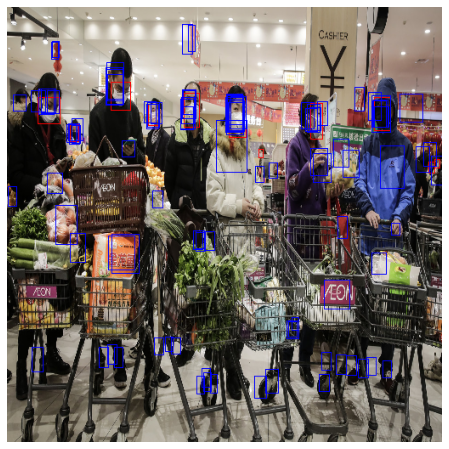

In [45]:
model = DETRModel(num_classes=num_classes,num_queries=num_queries)
model.load_state_dict(torch.load("/content/drive/MyDrive/detr_best.pth"))
view_sample(df_folds[df_folds['fold'] == 0],model=model,device=torch.device('cuda'))

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
